<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/main/Arimax%26Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# #Clone git for data
# !git clone https://github.com/ManuelBagasina/DATCapstone.git

Cloning into 'DATCapstone'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 371 (delta 55), reused 24 (delta 14), pack-reused 263 (from 4)
Receiving objects: 100% (371/371), 38.31 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_pca = pd.read_csv('data_preprocessed/df_pca.csv', index_col="Date")

In [32]:
df_pca

,Target_1day,Target_1week,Target_1month,Target_1year,PC1,PC2,PC3,PC4,PC5,PC6,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,1.128616,1.756699,10.863815,9.008636,14.561476,-1.604948,1.528668,2.102858,-5.963337,0.893487,...,1.658858,3.497496,0.213348,2.048665,1.338865,0.497815,1.247662,-0.909303,-1.108691,-0.053650
2021-10-01,-3.444611,0.245361,7.016815,0.616699,14.406776,-1.468897,1.331387,0.539305,-4.253693,0.266312,...,1.098895,0.001389,0.094622,0.035663,-0.914473,0.937885,0.290440,-1.252882,-0.960031,0.193812
2021-10-04,1.933304,3.601608,9.637054,-0.162506,14.390325,-1.488179,1.316971,-0.324433,-4.398946,-0.655289,...,0.000170,0.326801,-0.070584,-0.044231,-0.314576,0.583055,0.628367,-0.250889,-1.375202,0.325734
2021-10-05,0.873398,0.392517,8.744003,2.098389,14.363979,-1.486057,1.354653,-0.379696,-4.446430,-1.007056,...,0.087082,0.382113,-0.073701,0.208362,-0.625954,0.838457,0.668042,-0.328896,-0.942397,0.069769
2021-10-06,1.265991,-1.069672,9.313263,4.827072,14.365880,-1.487691,1.340708,-0.328917,-4.422206,-0.899366,...,0.217694,0.261894,-0.084478,0.121612,-0.611689,0.636050,0.847463,-0.053074,-0.865722,0.011029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.819061,NaN,NaN,NaN,-13.793414,-5.703602,14.549337,-0.379470,0.190111,-0.222769,...,0.283787,-0.204186,-0.274125,-0.197130,0.171742,-0.825501,-0.421517,0.290199,1.072260,-0.097901
2024-12-26,-3.426208,NaN,NaN,NaN,-13.805372,-5.719580,14.550602,-0.316178,0.252245,0.201239,...,0.110145,-0.138287,-0.216665,-0.233277,0.237574,-0.517891,-0.547533,0.097242,1.044506,-0.059685
2024-12-27,-3.386276,NaN,NaN,NaN,-13.762857,-5.698684,14.506236,-0.269646,0.264020,0.190458,...,0.390278,-0.402323,-0.283774,-0.495885,0.441878,-1.275086,-0.249263,0.649227,0.913195,-0.075322


In [33]:
df_pca_1day = df_pca.drop(['Target_1week', 'Target_1month', 'Target_1year'], axis=1)
df_pca_1day.dropna(inplace = True)

df_pca_1week = df_pca.drop(['Target_1day', 'Target_1month', 'Target_1year'], axis=1)
df_pca_1week.dropna(inplace = True)

df_pca_1month = df_pca.drop(['Target_1week', 'Target_1day', 'Target_1year'], axis=1)
df_pca_1month.dropna(inplace = True)

df_pca_1year = df_pca.drop(['Target_1week', 'Target_1month', 'Target_1day'], axis=1)
df_pca_1year.dropna(inplace = True)

In [34]:
df_pca_1day

,Target_1day,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Date,,,,,,,,,,,,,,,,,,,
2021-09-30,1.128616,14.561476,-1.604948,1.528668,2.102858,-5.963337,0.893487,-2.054500,0.828086,1.658858,3.497496,0.213348,2.048665,1.338865,0.497815,1.247662,-0.909303,-1.108691,-0.053650
2021-10-01,-3.444611,14.406776,-1.468897,1.331387,0.539305,-4.253693,0.266312,-1.144754,1.572145,1.098895,0.001389,0.094622,0.035663,-0.914473,0.937885,0.290440,-1.252882,-0.960031,0.193812
2021-10-04,1.933304,14.390325,-1.488179,1.316971,-0.324433,-4.398946,-0.655289,-0.746124,2.035091,0.000170,0.326801,-0.070584,-0.044231,-0.314576,0.583055,0.628367,-0.250889,-1.375202,0.325734
2021-10-05,0.873398,14.363979,-1.486057,1.354653,-0.379696,-4.446430,-1.007056,-0.950052,1.689094,0.087082,0.382113,-0.073701,0.208362,-0.625954,0.838457,0.668042,-0.328896,-0.942397,0.069769
2021-10-06,1.265991,14.365880,-1.487691,1.340708,-0.328917,-4.422206,-0.899366,-1.031258,1.868517,0.217694,0.261894,-0.084478,0.121612,-0.611689,0.636050,0.847463,-0.053074,-0.865722,0.011029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2.926788,-13.734227,-5.659917,14.484421,0.677523,0.298352,1.230812,0.435392,-2.091607,0.449053,3.208523,-0.046159,1.640244,2.638251,-1.072875,0.607777,0.624387,0.231342,0.350105
2024-12-24,0.819061,-13.793414,-5.703602,14.549337,-0.379470,0.190111,-0.222769,0.755547,-1.533731,0.283787,-0.204186,-0.274125,-0.197130,0.171742,-0.825501,-0.421517,0.290199,1.072260,-0.097901
2024-12-26,-3.426208,-13.805372,-5.719580,14.550602,-0.316178,0.252245,0.201239,1.315600,-1.412772,0.110145,-0.138287,-0.216665,-0.233277,0.237574,-0.517891,-0.547533,0.097242,1.044506,-0.059685


Naive Mean Model RMSE: 3.03


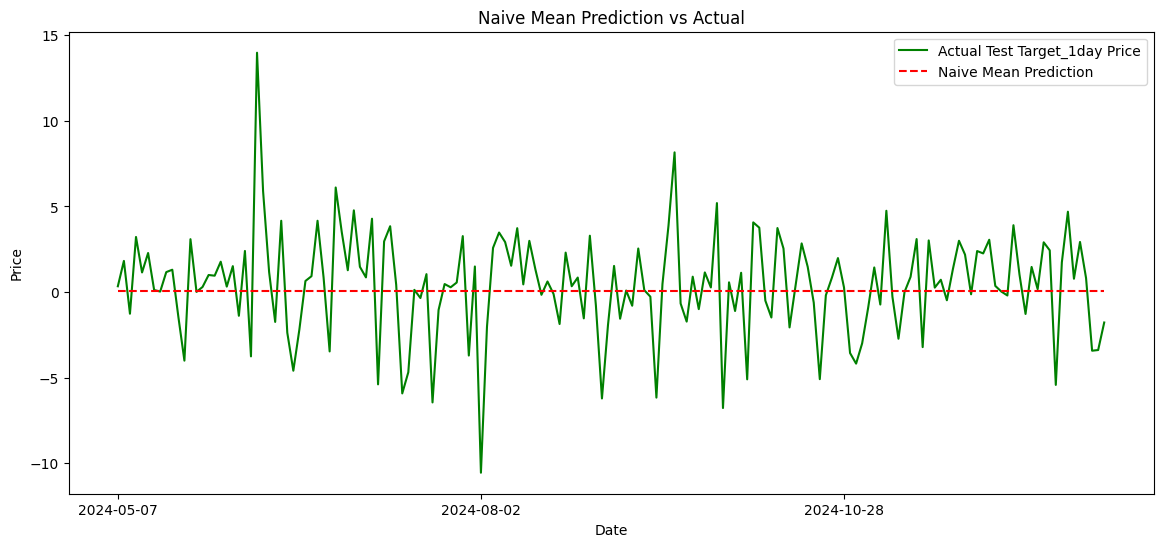

In [42]:
from sklearn.metrics import mean_squared_error

#Naive mean model
df = df_pca_1day

split_index = int(len(df) * 0.8)
train = df[:split_index]
test = df[split_index:]

# 1. 평균값 계산 (Train set 기준)
mean_price = train['Target_1day'].mean()

# 2. 테스트셋에 대해 평균값으로 예측
test['Naive_Mean_Pred'] = mean_price

# 3. 성능 확인
mse = mean_squared_error(test['Target_1day'], test['Naive_Mean_Pred'])
rmse = np.sqrt(mse)
print(f"Naive Mean Model RMSE: {rmse:.2f}")

# 4. 시각화
plt.figure(figsize=(14, 6))
plt.plot(test['Target_1day'], label='Actual Test Target_1day Price', color='green')
plt.plot(test['Naive_Mean_Pred'], label='Naive Mean Prediction', color='red', linestyle='--')
plt.title('Naive Mean Prediction vs Actual')
plt.xticks(test['Target_1day'].index[::60])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

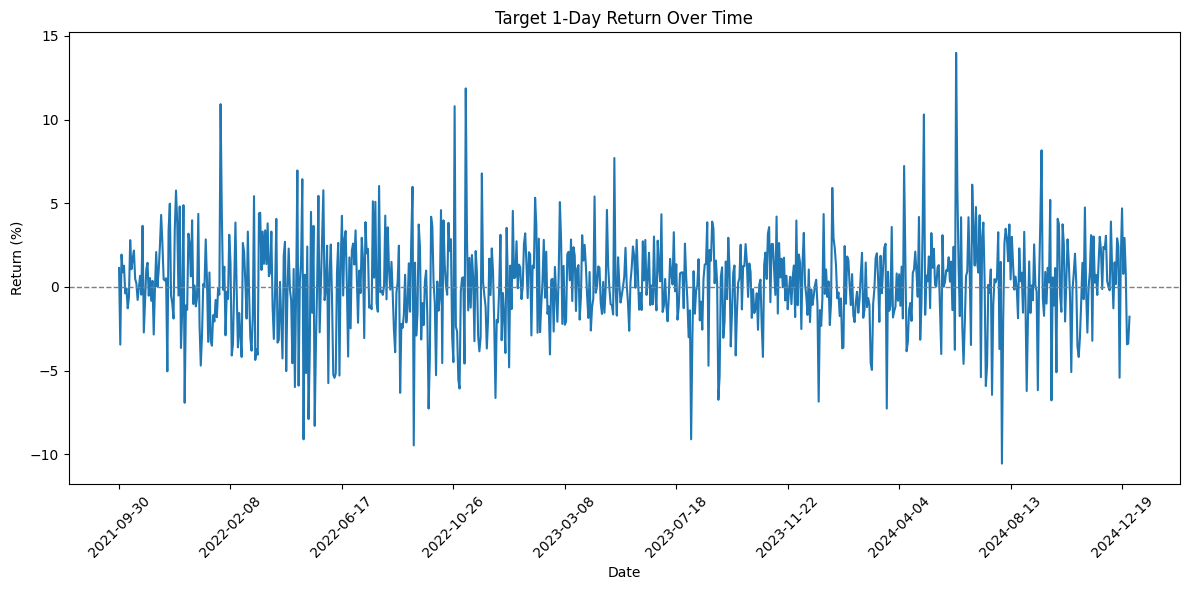

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pca_1day, x=df_pca_1day.index, y='Target_1day')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Target 1-Day Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return (%)')
step = 90
xticks = df_pca_1day.index[::step]
plt.xticks(xticks, rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df_pca

,Target_1day,Target_1week,Target_1month,Target_1year,PC1,PC2,PC3,PC4,PC5,PC6,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,1.128616,1.756699,10.863815,9.008636,14.561476,-1.604948,1.528668,2.102858,-5.963337,0.893487,...,1.658858,3.497496,0.213348,2.048665,1.338865,0.497815,1.247662,-0.909303,-1.108691,-0.053650
2021-10-01,-3.444611,0.245361,7.016815,0.616699,14.406776,-1.468897,1.331387,0.539305,-4.253693,0.266312,...,1.098895,0.001389,0.094622,0.035663,-0.914473,0.937885,0.290440,-1.252882,-0.960031,0.193812
2021-10-04,1.933304,3.601608,9.637054,-0.162506,14.390325,-1.488179,1.316971,-0.324433,-4.398946,-0.655289,...,0.000170,0.326801,-0.070584,-0.044231,-0.314576,0.583055,0.628367,-0.250889,-1.375202,0.325734
2021-10-05,0.873398,0.392517,8.744003,2.098389,14.363979,-1.486057,1.354653,-0.379696,-4.446430,-1.007056,...,0.087082,0.382113,-0.073701,0.208362,-0.625954,0.838457,0.668042,-0.328896,-0.942397,0.069769
2021-10-06,1.265991,-1.069672,9.313263,4.827072,14.365880,-1.487691,1.340708,-0.328917,-4.422206,-0.899366,...,0.217694,0.261894,-0.084478,0.121612,-0.611689,0.636050,0.847463,-0.053074,-0.865722,0.011029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.819061,NaN,NaN,NaN,-13.793414,-5.703602,14.549337,-0.379470,0.190111,-0.222769,...,0.283787,-0.204186,-0.274125,-0.197130,0.171742,-0.825501,-0.421517,0.290199,1.072260,-0.097901
2024-12-26,-3.426208,NaN,NaN,NaN,-13.805372,-5.719580,14.550602,-0.316178,0.252245,0.201239,...,0.110145,-0.138287,-0.216665,-0.233277,0.237574,-0.517891,-0.547533,0.097242,1.044506,-0.059685
2024-12-27,-3.386276,NaN,NaN,NaN,-13.762857,-5.698684,14.506236,-0.269646,0.264020,0.190458,...,0.390278,-0.402323,-0.283774,-0.495885,0.441878,-1.275086,-0.249263,0.649227,0.913195,-0.075322


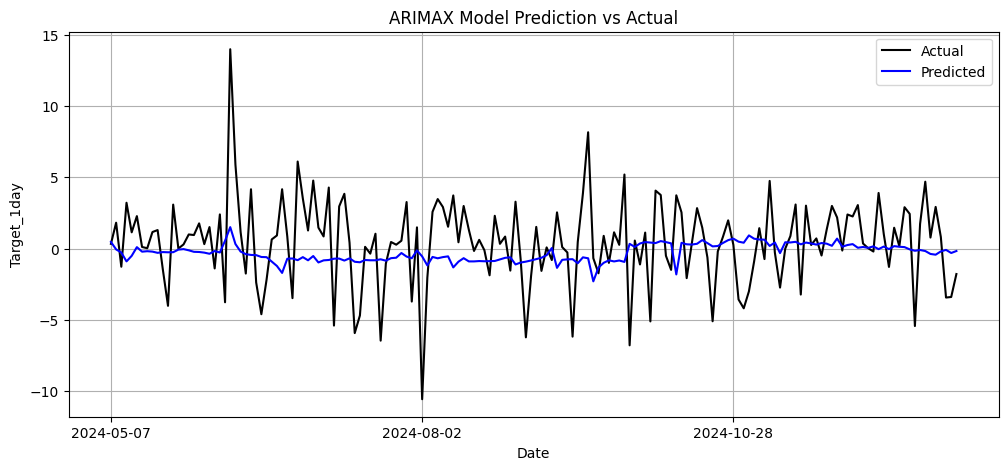

RMSE: 3.1199
MAE: 2.3833
R^2: -0.0751



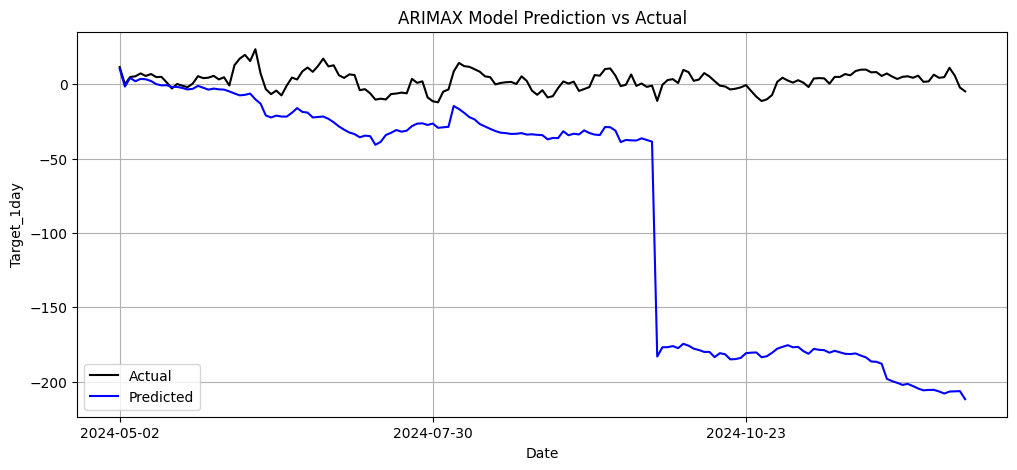

RMSE: 117.0938
MAE: 85.1873
R^2: -320.0601



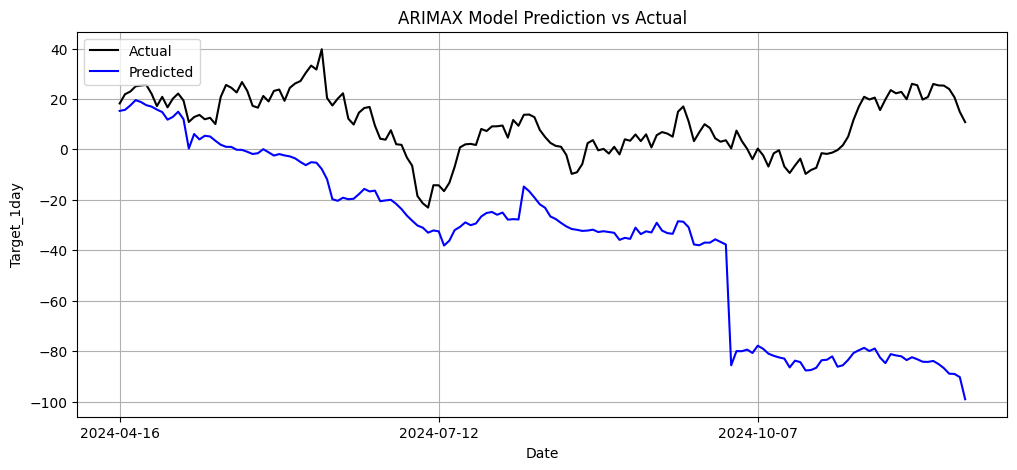

RMSE: 55.4171
MAE: 45.3248
R^2: -20.0783



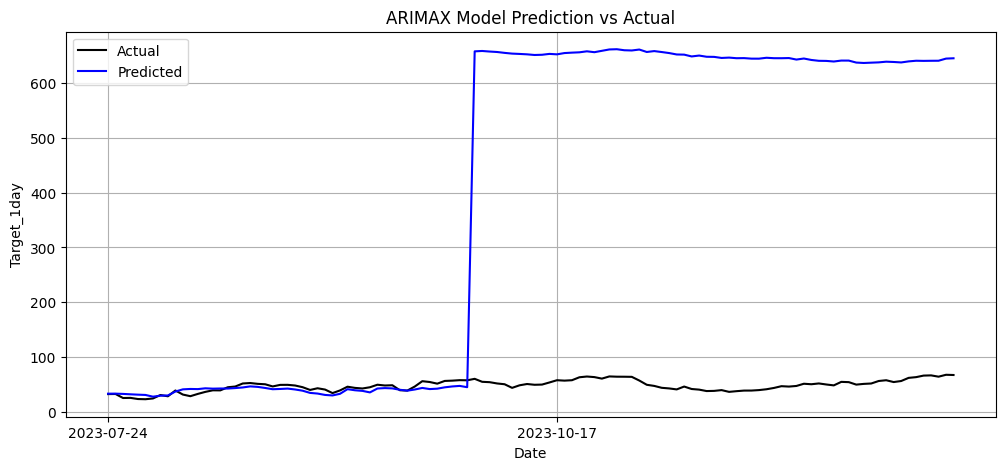

RMSE: 451.0340
MAE: 343.2144
R^2: -1843.2456



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

targets = ['Target_1day', 'Target_1week', 'Target_1month', 'Target_1year']

for i, df in enumerate([df_pca_1day, df_pca_1week, df_pca_1month, df_pca_1year]):
  y = df[targets[i]]
  X = df.drop(columns=targets[i])

  # Train / Test
  train_size = int(len(df) * 0.8)
  y_train, y_test = y[:train_size], y[train_size:]
  X_train, X_test = X[:train_size], X[train_size:]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # ARIMAX
  model = SARIMAX(y_train, exog=X_train, order=(1, 0, 0))  # AR(1) 예시
  results = model.fit(disp=False)

  # index for prediction
  start_idx = len(y_train)
  end_idx = len(y_train) + len(y_test) - 1

  # prediction
  y_pred = results.predict(start=start_idx, end=end_idx, exog=X_test)

  # indexing predicted results
  y_pred.index = y_test.index

  # Visualization
  plt.figure(figsize=(12, 5))
  plt.plot(y_test, label="Actual", color='black')
  plt.plot(y_pred, label="Predicted", color='blue')
  plt.title("ARIMAX Model Prediction vs Actual")
  plt.xlabel("Date")
  plt.ylabel("Target_1day")
  plt.legend()
  step = 60
  xticks = y_pred.index[::step]
  plt.xticks(xticks)
  plt.grid(True)
  plt.show()

  # Evaluation
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"RMSE: {rmse:.4f}")
  mae = mean_absolute_error(y_test, y_pred)
  print(f"MAE: {mae:.4f}")
  r2 = r2_score(y_test, y_pred)
  print(f"R^2: {r2:.4f}\n")

# Linear Regression

In [24]:
df = pd.read_csv('data_preprocessed/df_preprocessed.csv', index_col="Date")

In [25]:
#lag,rolling mean, rolling std feature generation
df['close_lag1'] = df['Close'].shift(1)
df['close_lag3'] = df['Close'].shift(10)
df['close_lag5'] = df['Close'].shift(30)
df['close_rolling_mean_5'] = df['Close'].rolling(window=5).mean()
df['close_rolling_std_5'] = df['Close'].rolling(window=5).std()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),...,reddit_Comment3_Sentiment_positive,Target_1day,Target_1week,Target_1month,Target_1year,close_lag1,close_lag3,close_lag5,close_rolling_mean_5,close_rolling_std_5
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,235.678,...,2.0,1.128616,1.756699,10.863815,9.008636,NaN,NaN,NaN,NaN,NaN
2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,240.465,...,1.0,-3.444611,0.245361,7.016815,0.616699,138.863876,NaN,NaN,NaN,NaN
2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,240.465,...,0.0,1.933304,3.601608,9.637054,-0.162506,139.992493,NaN,NaN,NaN,NaN
2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,240.465,...,0.0,0.873398,0.392517,8.744003,2.098389,136.547882,NaN,NaN,NaN,NaN
2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,240.465,...,0.0,1.265991,-1.069672,9.313263,4.827072,138.481186,NaN,NaN,138.648004,1.303059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,255.209412,257.926411,255.009620,257.916443,23234700,0.0,0.0,29700.580,4.1,253.590,...,0.0,0.819061,NaN,NaN,NaN,254.989655,247.497879,223.983734,252.881967,4.151512
2024-12-26,257.906429,259.814335,257.347047,258.735504,27237100,0.0,0.0,29700.580,4.1,253.590,...,0.0,-3.426208,NaN,NaN,NaN,257.916443,246.219284,223.983734,255.073553,3.644654
2024-12-27,257.546826,258.415896,252.782075,255.309296,42355300,0.0,0.0,29700.580,4.1,253.590,...,0.0,-3.386276,NaN,NaN,NaN,258.735504,247.687683,224.872757,256.232281,1.973962


In [26]:
df_1day = df.drop(['Target_1week', 'Target_1month', 'Target_1year'], axis=1)
df_1day.dropna(inplace = True)

df_1week = df.drop(['Target_1day', 'Target_1month', 'Target_1year'], axis=1)
df_1week.dropna(inplace = True)

df_1month = df.drop(['Target_1week', 'Target_1day', 'Target_1year'], axis=1)
df_1month.dropna(inplace = True)

df_1year = df.drop(['Target_1week', 'Target_1month', 'Target_1day'], axis=1)
df_1year.dropna(inplace = True)

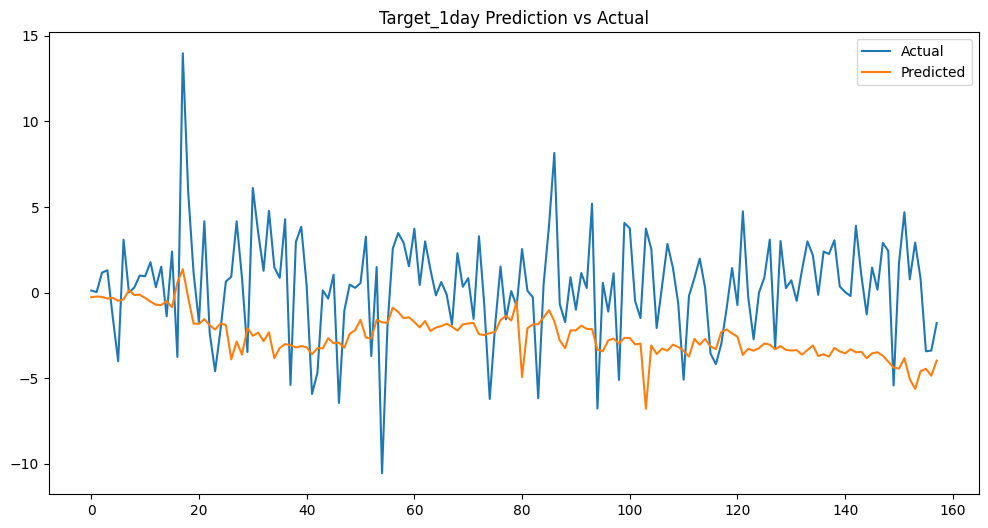

RMSE: 4.2988
MAE: 3.5734
R²: -0.9888
sMAPE: 156.65%



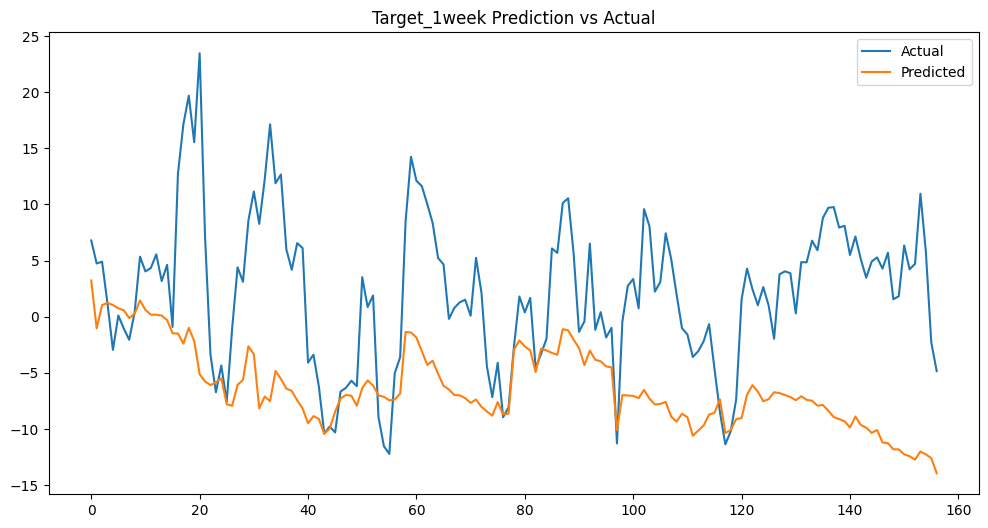

RMSE: 10.6935
MAE: 8.7639
R²: -1.6328
sMAPE: 149.13%



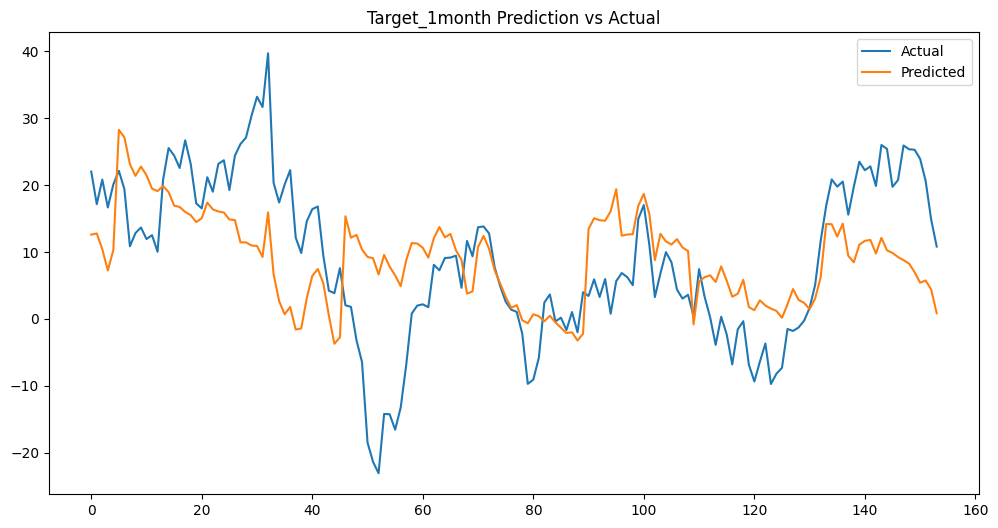

RMSE: 10.7739
MAE: 8.7899
R²: 0.1917
sMAPE: 103.52%



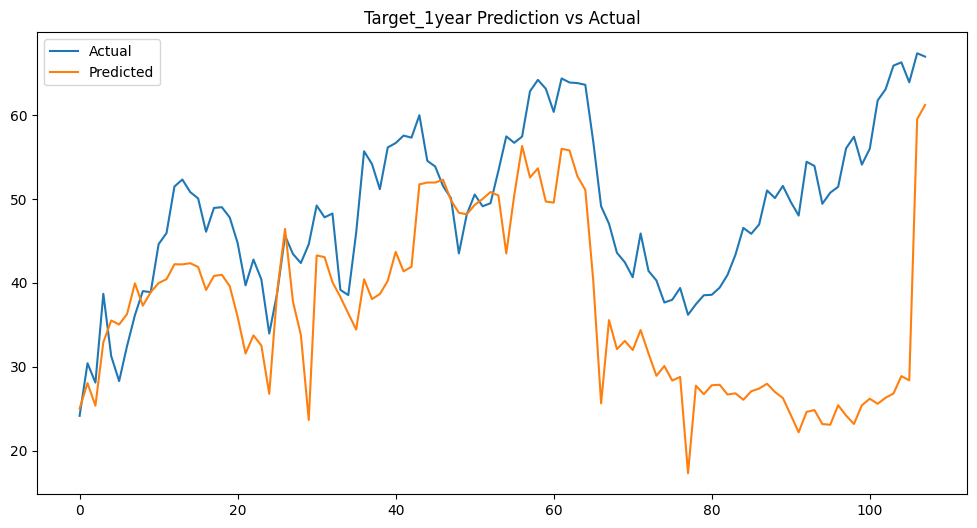

RMSE: 15.7743
MAE: 12.3672
R²: -1.7576
sMAPE: 30.29%



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_val = np.mean(diff / (denominator + 1e-8)) * 100
    return smape_val

targets = ['Target_1day', 'Target_1week', 'Target_1month', 'Target_1year']

for i, df in enumerate([df_1day, df_1week, df_1month, df_1year]):
  X = df.drop(columns=[col for col in df.columns if 'Target' in col])
  y = df[targets[i]]

  split_index = int(len(df) * 0.8)
  X_train, X_test = X[:split_index], X[split_index:]
  y_train, y_test = y[:split_index], y[split_index:]

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model = Ridge(alpha=1.0)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  
  plt.figure(figsize=(12, 6))
  plt.plot(y_test.values, label='Actual')
  plt.plot(y_pred, label='Predicted')
  plt.title(f'{targets[i]} Prediction vs Actual')
  plt.legend()
  plt.show()
  
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  smp = smape(y_test.values, y_pred)

  print(f'RMSE: {rmse:.4f}')
  print(f'MAE: {mae:.4f}')
  print(f'R²: {r2:.4f}')
  print(f"sMAPE: {smp:.2f}%\n")